Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



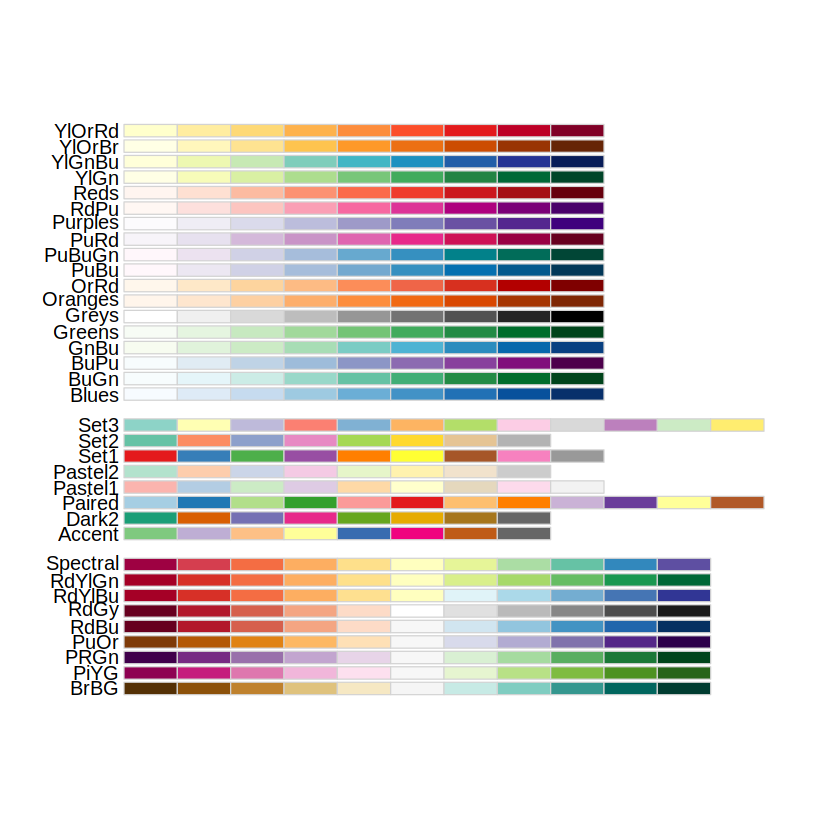

In [25]:
install.packages("janitor")
library(tidyverse)
library(repr)
library(readxl)
library(janitor)
library(RColorBrewer)
display.brewer.all()
options(repr.matrix.max.rows = 6)

In [43]:
url <- "https://raw.githubusercontent.com/ptank1/dsci-100-2023w1-group-30/main/Sleep_health_and_lifestyle_dataset.csv"
sleep_data <- read_csv(url)
head(sleep_data)

sleep_data


Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [44]:
sleep_data <- sleep_data |> clean_names() 
sleep_data

person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [45]:
sleep_data_select <- sleep_data |>
separate(col = blood_pressure, into = c("systolic_blood_pressure", "diastolic_blood_pressure"), sep = "/") |>
select(person_id, gender, sleep_duration, quality_of_sleep, physical_activity_level, sleep_disorder)


sleep_data_select

person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level,sleep_disorder
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Male,6.1,6,42,None
2,Male,6.2,6,60,None
3,Male,6.2,6,60,None
⋮,⋮,⋮,⋮,⋮,⋮
372,Female,8.1,9,75,Sleep Apnea
373,Female,8.1,9,75,Sleep Apnea
374,Female,8.1,9,75,Sleep Apnea


In [46]:
sleep_data_tidy <- sleep_data_select |>
group_by(gender, sleep_duration, physical_activity_level, sleep_disorder) |>
summarize(average_quality_of_sleep = mean(quality_of_sleep))

sleep_data_tidy

`summarise()` has grouped output by 'gender', 'sleep_duration',
'physical_activity_level'. You can override using the `.groups` argument.


gender,sleep_duration,physical_activity_level,sleep_disorder,average_quality_of_sleep
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Female,5.8,32,Sleep Apnea,4
Female,5.9,90,Sleep Apnea,6
Female,6.0,90,None,6
⋮,⋮,⋮,⋮,⋮
Male,7.9,75,None,7
Male,7.9,90,None,8
Male,8.1,85,Sleep Apnea,9


In [47]:
sleep_data_tidy |> distinct(sleep_disorder)

gender,sleep_duration,physical_activity_level,sleep_disorder
<chr>,<dbl>,<dbl>,<chr>
Female,5.8,32,Sleep Apnea
Female,5.9,90,Sleep Apnea
Female,6.0,90,None
⋮,⋮,⋮,⋮
Male,7.9,75,None
Male,7.9,90,None
Male,8.1,85,Sleep Apnea


In [48]:
num_obs <- nrow(sleep_data_tidy)
sleep_data_tidy|>
  group_by(sleep_disorder) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

num_obs

sleep_disorder,count,percentage
<chr>,<int>,<dbl>
Insomnia,22,24.17582
None,47,51.64835
Sleep Apnea,22,24.17582


[1] 91

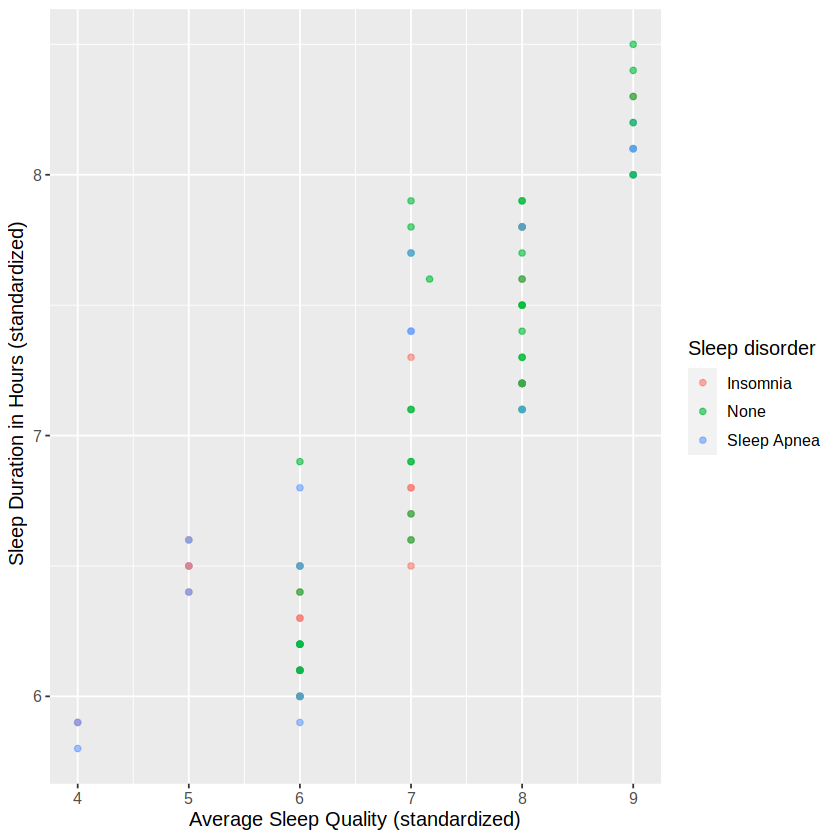

In [49]:
sleep_duration_plot <- sleep_data_tidy |>
  ggplot(aes(x = average_quality_of_sleep, y = sleep_duration, color = sleep_disorder)) +
  geom_point(alpha = 0.6) +
  labs(x = "Average Sleep Quality (standardized)",
       y = " Sleep Duration in Hours (standardized)",
       color = "Sleep disorder") +
  theme(text = element_text(size = 12))
       
sleep_duration_plot

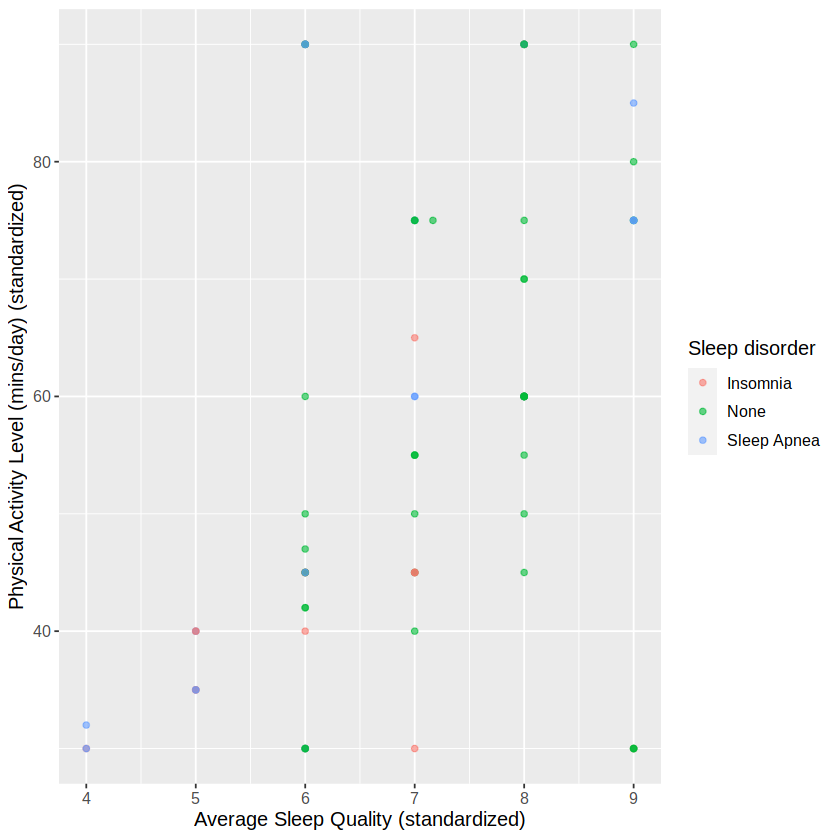

In [50]:
physical_activity_plot <- sleep_data_tidy |>
  ggplot(aes(x = average_quality_of_sleep, y = physical_activity_level, color = sleep_disorder)) +
  geom_point(alpha = 0.6) +
  labs(x = "Average Sleep Quality (standardized)",
       y = "Physical Activity Level (mins/day) (standardized)",
       color = "Sleep disorder") +
  theme(text = element_text(size = 12))
       
physical_activity_plot

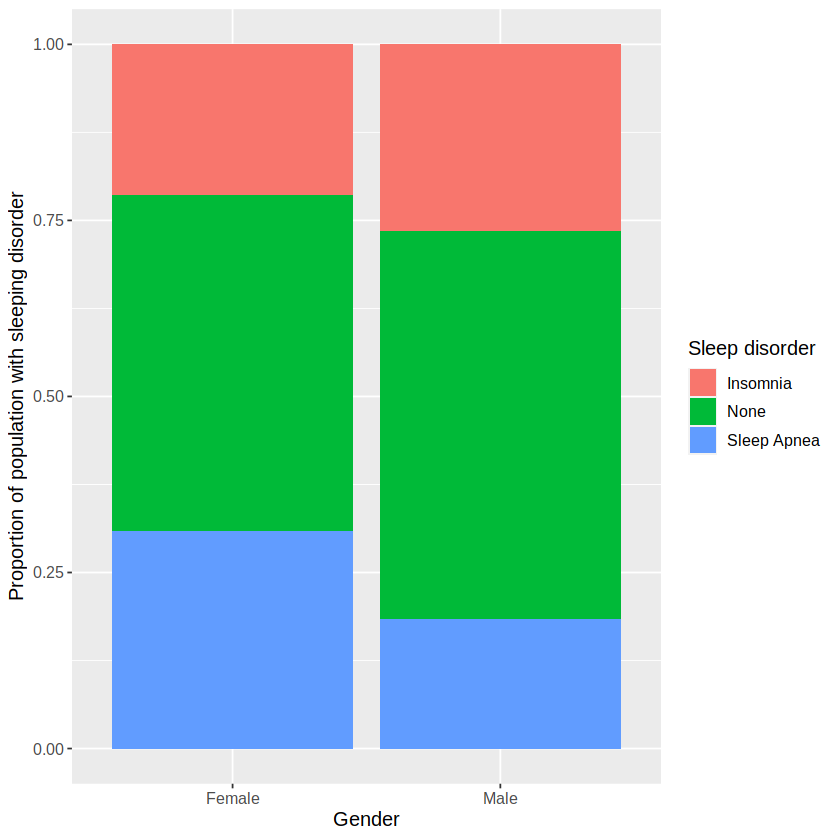

In [51]:
gender_plot <- sleep_data_tidy |>
  ggplot(aes(x = gender, fill = sleep_disorder)) +
  geom_bar(position = 'fill') +
  labs(x = "Gender",
       y = "Proportion of population with sleeping disorder",
       fill = "Sleep disorder") +
  theme(text = element_text(size = 12))
       
gender_plot